In [1]:
import astropy

In [2]:
astropy.__version__

'4.2.1'

In [3]:
from matplotlib import pyplot as plt
import numpy as np

import cProfile
import pstats
from pstats import SortKey

In [2]:
nx = np.array([10, 20, 30, 50, 70, 100, 150, 200])
cpuTimes = np.array([1.03, 1.67, 2.83, 4.41, 6.09, 8.39, 12.4, 16.5])
wallTimes = np.array([1.03, 1.65, 2.83, 4.4, 6.09, 8.38, 12.4, 16.5])

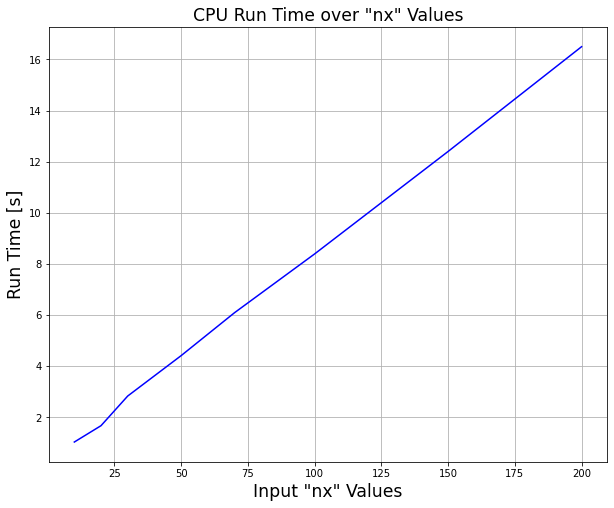

In [9]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nx, cpuTimes, label = 'CPU Times', color = 'blue')
#plt.plot(nx, wallTimes, label = 'Wall Times', color = 'red')
plt.title('CPU Run Time over "nx" Values', fontsize = 'xx-large')
plt.xlabel('Input "nx" Values', fontsize = 'xx-large')
plt.ylabel('Run Time [s]', fontsize = 'xx-large')
plt.grid()

In [1]:
# test starts here

import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as c

import newdust

%matplotlib inline

In [11]:
NE, NTH = 1, 100
EVALS   = np.logspace(-1, 1, NE) * u.keV
THVALS  = np.logspace(-1, 4, NTH) * u.arcsec

# Initialize each halo type
MieSi_uniform_halo = newdust.halos.UniformGalHalo(EVALS, THVALS)
MieSi_screen_halo = newdust.halos.ScreenGalHalo(EVALS, THVALS)
MieGr_uniform_halo = newdust.halos.UniformGalHalo(EVALS, THVALS)
MieGr_screen_halo = newdust.halos.ScreenGalHalo(EVALS, THVALS)
RGDr_uniform_halo = newdust.halos.UniformGalHalo(EVALS, THVALS)
RGDr_screen_halo = newdust.halos.ScreenGalHalo(EVALS, THVALS)

In [12]:
MD = 1.e-6
AMAX = 0.3 # in um

ECUT = newdust.graindist.sizedist.ExpCutoff(acut=AMAX)

SiPOP_cut = newdust.SingleGrainPop(ECUT, 'Silicate', 'Mie', md = MD)
GrPOP_cut = newdust.SingleGrainPop(ECUT, 'Graphite', 'Mie', md = MD)
RGDrPOP_cut = newdust.SingleGrainPop(ECUT, 'Drude', 'RG', md = MD)

SiPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Silicate', 'Mie', md = MD)
GrPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Graphite', 'Mie', md = MD)
RGDrPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Drude', 'RG', md = MD)

In [30]:
#%%time
# do screen halo calculation first since it is faster, using Expcut dis amax = 0.3
X = np.array([0.2, 0.4, 0.6, 0.8])

MieSi_data = np.zeros((len(X), len(THVALS)))
MieGr_data = np.zeros((len(X), len(THVALS)))
RGDr_data = np.zeros((len(X), len(THVALS)))


i = 0

for xi in X:
    print(xi)
    MieSi_screen_halo.calculate(SiPOP_cut, x = xi)
    MieGr_screen_halo.calculate(GrPOP_cut, x = xi)
    RGDr_screen_halo.calculate(RGDrPOP_cut, x = xi)

    MieSi_data[i,:] = MieSi_screen_halo.norm_int[0,:]
    MieGr_data[i,:] = MieGr_screen_halo.norm_int[0,:]
    RGDr_data[i,:] = RGDr_screen_halo.norm_int[0,:]
    
    
    i += 1


0.2
0.4
0.6
0.8


Text(0, 0.5, 'Normalized Intensity (1 / arcsec2)')

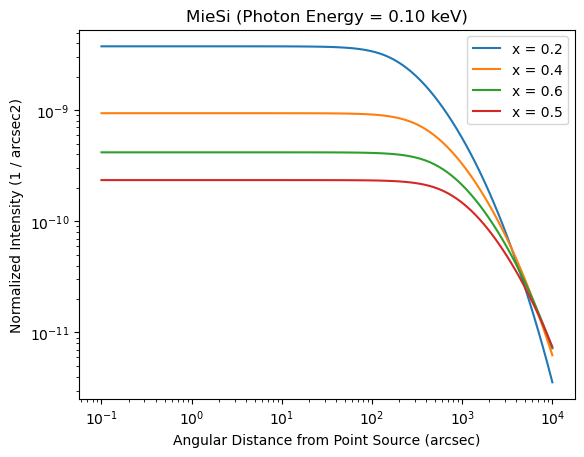

In [31]:
i = 0

plt.plot(THVALS, MieSi_data[0,:], label='x = 0.2')
plt.plot(THVALS, MieSi_data[1,:], label='x = 0.4')
plt.plot(THVALS, MieSi_data[2,:], label='x = 0.6')
plt.plot(THVALS, MieSi_data[3,:], label='x = 0.5')

plt.loglog()
plt.legend()

plt.title("MieSi (Photon Energy = {:.2f})".format(EVALS[i]))
plt.xlabel(r"Angular Distance from Point Source ({})".format(THVALS.unit))
plt.ylabel(r"Normalized Intensity ({})".format(MieSi_screen_halo.norm_int.unit))

Text(0, 0.5, 'Normalized Intensity (1 / arcsec2)')

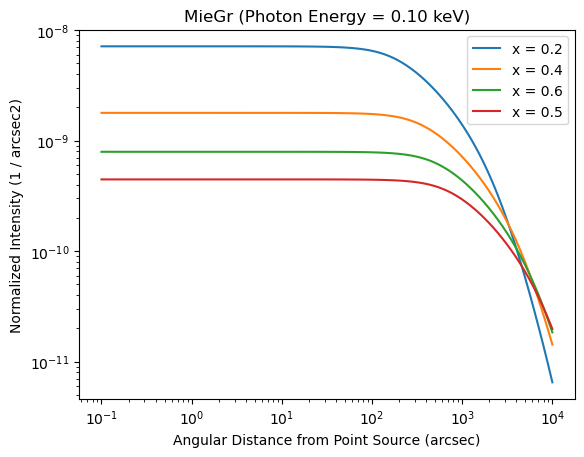

In [33]:
i = 0

plt.plot(THVALS, MieGr_data[0,:], label='x = 0.2')
plt.plot(THVALS, MieGr_data[1,:], label='x = 0.4')
plt.plot(THVALS, MieGr_data[2,:], label='x = 0.6')
plt.plot(THVALS, MieGr_data[3,:], label='x = 0.5')

plt.loglog()
plt.legend()

plt.title("MieGr (Photon Energy = {:.2f})".format(EVALS[i]))
plt.xlabel(r"Angular Distance from Point Source ({})".format(THVALS.unit))
plt.ylabel(r"Normalized Intensity ({})".format(MieGr_screen_halo.norm_int.unit))

Text(0, 0.5, 'Normalized Intensity (1 / arcsec2)')

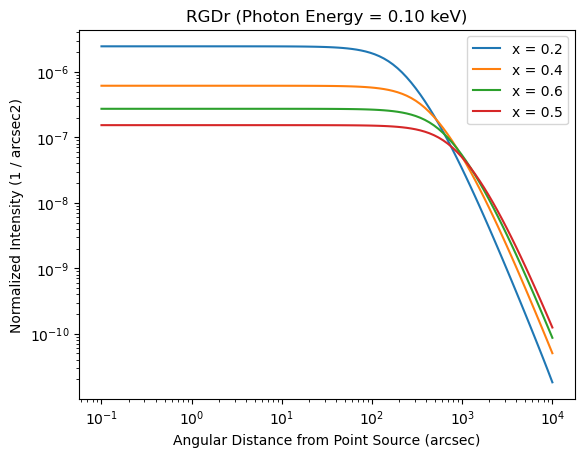

In [34]:
i = 0

plt.plot(THVALS, RGDr_data[0,:], label='x = 0.2')
plt.plot(THVALS, RGDr_data[1,:], label='x = 0.4')
plt.plot(THVALS, RGDr_data[2,:], label='x = 0.6')
plt.plot(THVALS, RGDr_data[3,:], label='x = 0.5')

plt.loglog()
plt.legend()

plt.title("RGDr (Photon Energy = {:.2f})".format(EVALS[i]))
plt.xlabel(r"Angular Distance from Point Source ({})".format(THVALS.unit))
plt.ylabel(r"Normalized Intensity ({})".format(RGDr_screen_halo.norm_int.unit))

In [35]:
# In this following part, I plan to do test using different amax to see difference.
MD = 1.e-6
AMAX = 0.1 # in um

ECUT = newdust.graindist.sizedist.ExpCutoff(acut=AMAX)

SiPOP_cut = newdust.SingleGrainPop(ECUT, 'Silicate', 'Mie', md = MD)
GrPOP_cut = newdust.SingleGrainPop(ECUT, 'Graphite', 'Mie', md = MD)
RGDrPOP_cut = newdust.SingleGrainPop(ECUT, 'Drude', 'RG', md = MD)

SiPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Silicate', 'Mie', md = MD)
GrPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Graphite', 'Mie', md = MD)
RGDrPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Drude', 'RG', md = MD)

MieSi_screen_halo.calculate(SiPOP_cut, x = 0.2)
MieGr_screen_halo.calculate(GrPOP_cut, x = 0.2)
RGDr_screen_halo.calculate(RGDrPOP_cut, x = 0.2)

Text(0, 0.5, 'Normalized Intensity (1 / arcsec2)')

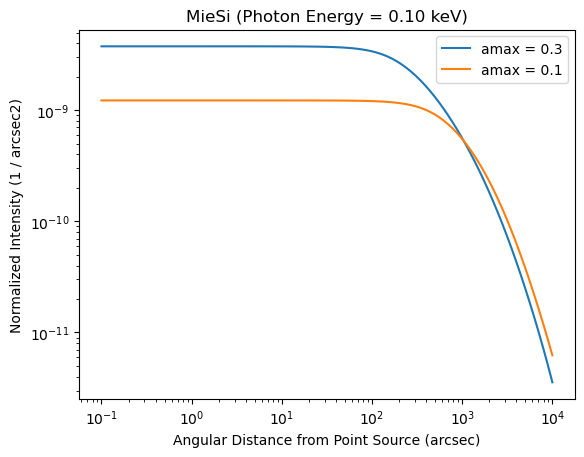

In [36]:
plt.plot(THVALS, MieSi_data[0,:], label='amax = 0.3')
plt.plot(THVALS, MieSi_screen_halo.norm_int[0,:], label='amax = 0.1')


plt.loglog()
plt.legend()

plt.title("MieSi (Photon Energy = {:.2f})".format(EVALS[i]))
plt.xlabel(r"Angular Distance from Point Source ({})".format(THVALS.unit))
plt.ylabel(r"Normalized Intensity ({})".format(MieSi_screen_halo.norm_int.unit))